In [17]:
from connec_functions import execute_to_df, generate_sparql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reference information
Analysis of manually curated standard affiliation information

In [19]:
reference_info = execute_to_df("0_reference_info.sparql") #requires large file ingest
reference_info.head()

,standard_affiliation,name,qh,group,flemish,country_name,country_identifier,country_code2,country_code3,country_id
0,https://marineinfo.org/id/institute/36,VLIZ Flanders Marine Institute,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,true,Kingdom of Belgium,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
1,https://marineinfo.org/id/institute/5443,INBO Research Institute for Nature and Forest,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,true,Kingdom of Belgium,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
2,https://marineinfo.org/id/institute/8576,RMCA Royal Museum for Central Africa,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Museum,true,Kingdom of Belgium,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
3,https://marineinfo.org/id/institute/471,Ghent University,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/University,true,Kingdom of Belgium,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
4,https://marineinfo.org/id/institute/1883,Royal Belgian Institute of Natural Sciences (R...,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,true,Kingdom of Belgium,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...


In [20]:
reference_info.shape #this is too little...

(135, 10)

In [21]:
marineinfo_affils = reference_info[reference_info["standard_affiliation"].str.contains("https://marineinfo.org/id/institute/")]
marineinfo_affils.groupby("standard_affiliation").nunique().sum()['name']

79

In [22]:
ror_affils = reference_info[reference_info["standard_affiliation"].str.contains("https://ror.org/")]
ror_affils.groupby("standard_affiliation").nunique().sum()['name']

7

In [23]:
other_affils = reference_info[reference_info["standard_affiliation"].str.contains("/affiliation/")]
other_affils.groupby("standard_affiliation").nunique().sum()['name']

49

In [24]:
reference_info.groupby('name').nunique()

,standard_affiliation,qh,group,flemish,country_name,country_identifier,country_code2,country_code3,country_id
name,,,,,,,,,
AXYS Technologies Inc.,1,1,1,1,1,1,1,1,1
Agentschap voor Natuur en Bos,1,1,1,1,1,1,1,1,1
Amelior,1,1,1,1,1,1,1,1,1
Antarctic Biodiversity Information Facility (ANTABIF),1,1,1,1,1,1,1,1,1
Antwerp Gas Terminal N.V.,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Vlaams Kenniscentrum Water,1,1,1,1,1,1,1,1,1
Vlaamse Milieumaatschappij,1,1,1,1,1,1,1,1,1
Walloon Agricultural Research Center,1,1,1,1,1,1,1,1,1


#### Distribution of QH in standardized list of affiliations

In [25]:
qh_dist = reference_info.groupby('qh').nunique()
qh_dist

,standard_affiliation,name,group,flemish,country_name,country_identifier,country_code2,country_code3,country_id
qh,,,,,,,,,
http://lifewatch.org/ns/Civil_society,9,9,3,1,1,1,1,1,1
http://lifewatch.org/ns/Industry,14,14,2,1,1,1,1,1,1
http://lifewatch.org/ns/Policy,23,23,3,1,1,1,1,1,1
http://lifewatch.org/ns/Science,89,89,7,1,1,1,1,1,1


In [26]:
qh_group_dist = reference_info.groupby(['qh', 'group']).nunique()
qh_group_dist.reset_index()

,qh,group,standard_affiliation,name,flemish,country_name,country_identifier,country_code2,country_code3,country_id
0,http://lifewatch.org/ns/Civil_society,http://lifewatch.org/ns/Creative_body,1,1,1,1,1,1,1,1
1,http://lifewatch.org/ns/Civil_society,http://lifewatch.org/ns/Non-profit_organization,6,6,1,1,1,1,1,1
2,http://lifewatch.org/ns/Civil_society,http://lifewatch.org/ns/Other,2,2,1,1,1,1,1,1
3,http://lifewatch.org/ns/Industry,http://lifewatch.org/ns/Company,11,11,1,1,1,1,1,1
4,http://lifewatch.org/ns/Industry,http://lifewatch.org/ns/Consultancy,3,3,1,1,1,1,1,1
5,http://lifewatch.org/ns/Policy,http://lifewatch.org/ns/Defence,3,3,1,1,1,1,1,1
6,http://lifewatch.org/ns/Policy,http://lifewatch.org/ns/Governmental_body,16,16,1,1,1,1,1,1
7,http://lifewatch.org/ns/Policy,http://lifewatch.org/ns/Other_public_authorities,4,4,1,1,1,1,1,1
8,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Data_infrastructure,3,3,1,1,1,1,1,1
9,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/International_programme,2,2,1,1,1,1,1,1


In [27]:
group_dist = reference_info.groupby('group').nunique()
group_dist

,standard_affiliation,name,qh,flemish,country_name,country_identifier,country_code2,country_code3,country_id
group,,,,,,,,,
http://lifewatch.org/ns/Company,11,11,1,1,1,1,1,1,1
http://lifewatch.org/ns/Consultancy,3,3,1,1,1,1,1,1,1
http://lifewatch.org/ns/Creative_body,1,1,1,1,1,1,1,1,1
http://lifewatch.org/ns/Data_infrastructure,3,3,1,1,1,1,1,1,1
http://lifewatch.org/ns/Defence,3,3,1,1,1,1,1,1,1
http://lifewatch.org/ns/Governmental_body,16,16,1,1,1,1,1,1,1
http://lifewatch.org/ns/International_programme,2,2,1,1,1,1,1,1,1
http://lifewatch.org/ns/Museum,4,4,1,1,1,1,1,1,1
http://lifewatch.org/ns/Non-profit_organization,6,6,1,1,1,1,1,1,1


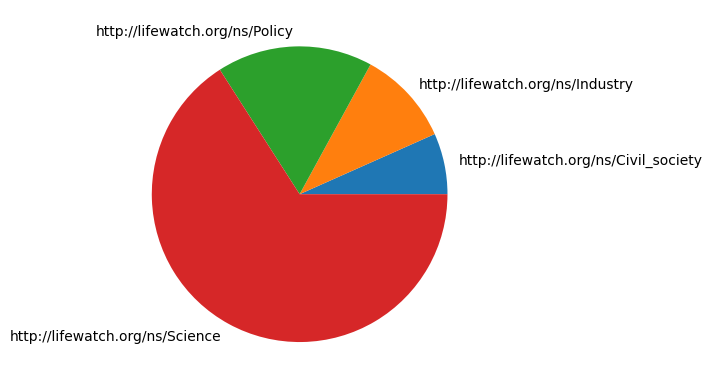

In [28]:
# distribution of Quadruple helix category
fig, ax = plt.subplots()
ax.pie(qh_dist['standard_affiliation'], labels=qh_dist.index)

plt.show()

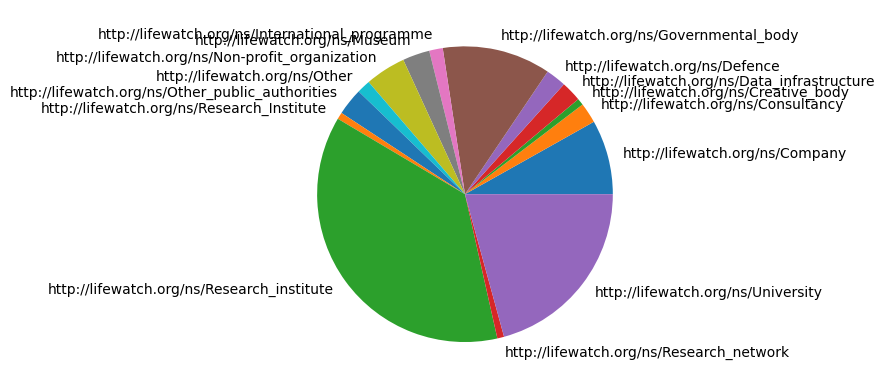

In [29]:
# distribution of Groups
fig, ax = plt.subplots()
ax.pie(group_dist['standard_affiliation'], labels=group_dist.index)

plt.show()

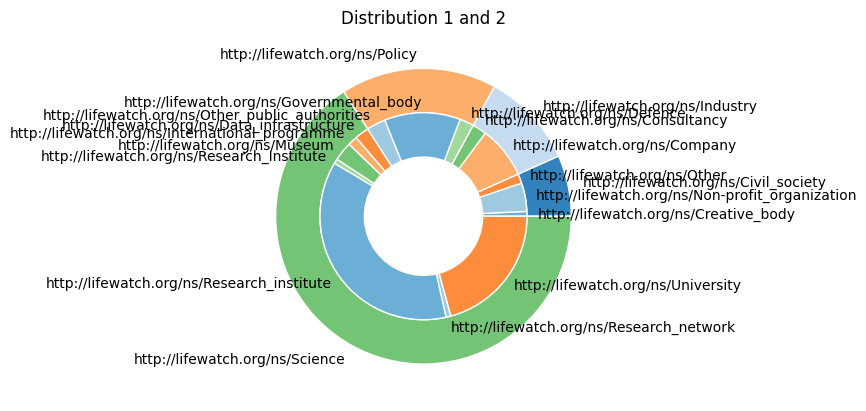

In [36]:
df = qh_group_dist.copy().reset_index()
df_qh = df.groupby('qh', sort=False)['standard_affiliation'].sum()
fig, ax = plt.subplots()

size = 0.3

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4)*3)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(df_qh, labels=df_qh.index , radius=1, colors=outer_colors, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(df['standard_affiliation'], labels=df['group'], radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Distribution 1 and 2')
plt.show()